## Q1. What is Gradient Boosting Regression?

- Gradient Boosting Regression is a machine learning technique that belongs to the ensemble learning methods. Ensemble learning involves combining the predictions of multiple models to improve overall performance.
- The "gradient" in Gradient Boosting refers to the optimization method used, where the algorithm minimizes the loss function (often mean squared error for regression problems) by iteratively fitting new models to the negative gradient of the loss function.
- Gradient Boosting Regression is a powerful and flexible technique, often producing accurate predictions for regression problems.

***


## Q2. Implement a simple gradient boosting algorithm from scratch using Python and NumPy. Use a simple regression problem as an example and train the model on a small dataset. Evaluate the model's performance using metrics such as mean squared error and R-squared.

In [18]:
from sklearn.datasets import make_regression

X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42 )

In [20]:
import numpy as np
import pandas as pd

In [21]:
## Manuale Implementation
from sklearn.tree import DecisionTreeRegressor

class GradientBoostingRegressorM:
    def __init__(self, n_estimators=100, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.models = []

    def fit(self, X, y):
        # Initialize with the mean of the target variable
        initial_prediction = np.mean(y)
        self.models.append(('initial', initial_prediction))

        for i in range(self.n_estimators):
            # Calculate residuals
            residuals = y - self.predict(X)

            # Fit a weak model (decision tree) to the residuals
            tree = DecisionTreeRegressor(max_depth=3)
            tree.fit(X, residuals)

            # Update the model with the new weak model
            self.models.append(('tree', tree))

    def predict(self, X):
        # Make predictions using the current ensemble of models
        predictions = self.models[0][1]  # Start with the initial prediction
        for model_type, model in self.models[1:]:
            if model_type == 'tree':
                predictions += self.learning_rate * model.predict(X)

        return predictions

In [22]:
## Sklearn Implementation
from sklearn.ensemble import GradientBoostingRegressor

In [23]:
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
gb_regressor.fit(X_train, y_train)

regression2 = GradientBoostingRegressorM()
regression2.fit(X_train, y_train)

In [24]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_pred1 = gb_regressor.predict(X_test)
y_pred2 = regression2.predict(X_test)


In [25]:
# Evaluate the model
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)

mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

In [26]:
import matplotlib.pyplot as plt

Mean Squared Error: 77.12185940356264
R-squared: 0.9379709683069024


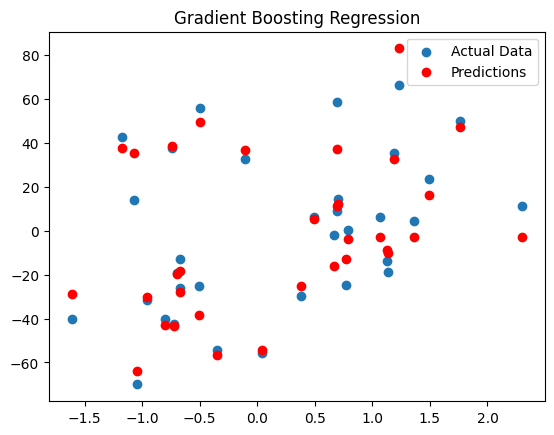

In [28]:
print(f"Mean Squared Error: {mse1}")
print(f"R-squared: {r2_1}")

# Choose a specific feature for plotting (e.g., the first feature)
feature_index = 0
x_values = X_test[:, feature_index]

# Plot the original data and predictions
plt.scatter(x_values, y_test, label='Actual Data')
plt.scatter(x_values, y_pred1, label='Predictions', color='red')
plt.title('Gradient Boosting Regression')
plt.legend()
plt.show()

Mean Squared Error: 76.77065098985054
R-squared: 0.9382534448705319


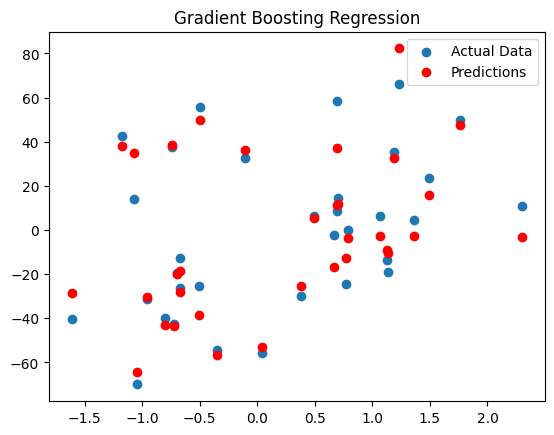

In [29]:
print(f"Mean Squared Error: {mse2}")
print(f"R-squared: {r2_2}")

# Choose a specific feature for plotting (e.g., the first feature)
feature_index = 0
x_values = X_test[:, feature_index]

# Plot the original data and predictions
plt.scatter(x_values, y_test, label='Actual Data')
plt.scatter(x_values, y_pred2, label='Predictions', color='red')
plt.title('Gradient Boosting Regression')
plt.legend()
plt.show()

***


## Q3. Experiment with different hyperparameters such as learning rate, number of trees, and tree depth to optimise the performance of the model. Use grid search or random search to find the best hyperparameters


In [30]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

In [35]:
# Create the GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor()

# Create GridSearchCV
grid_search = GridSearchCV(gb_regressor, param_grid = param_grid, cv=3, scoring='neg_mean_squared_error', verbose=3)


In [36]:
# Fit the model to the training data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=-1104.758 total time=   0.0s
[CV 2/3] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=-832.569 total time=   0.0s
[CV 3/3] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=-501.378 total time=   0.1s
[CV 1/3] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=-641.265 total time=   0.2s
[CV 2/3] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=-504.888 total time=   0.1s
[CV 3/3] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=-235.354 total time=   0.0s
[CV 1/3] END learning_rate=0.01, max_depth=3, n_estimators=150;, score=-421.701 total time=   0.1s
[CV 2/3] END learning_rate=0.01, max_depth=3, n_estimators=150;, score=-338.796 total time=   0.1s
[CV 3/3] END learning_rate=0.01, max_depth=3, n_estimators=150;, score=-144.208 total time=   0.1s
[CV 1/3] END learning_rate=0.01, max_depth=4, n_es

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error', verbose=3)

In [37]:
# Get the best hyperparameters
grid_search.best_params_

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}

In [38]:
# Use the best model for prediction
best_gb_regressor = grid_search.best_estimator_
y_pred_best = best_gb_regressor.predict(X_test)

# Evaluate the best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

# Print the evaluation metrics
print(f"Best Model Mean Squared Error: {mse_best}")
print(f"Best Model R-squared: {r2_best}")

Best Model Mean Squared Error: 76.15683770991781
Best Model R-squared: 0.9387471342562527


***

## Q4. What is a weak learner in Gradient Boosting?

- A weak learner, in the context of Gradient Boosting, refers to a model that performs slightly better than random chance on a given problem. 
- It is typically a simple model with limited predictive power, such as a shallow decision tree or a linear model. 
- Weak learners are often used in ensemble methods like Gradient Boosting, where multiple weak learners are combined to form a strong predictive model. 

***


## Q5. What is the intuition behind the Gradient Boosting algorithm?

- The intuition behind Gradient Boosting lies in sequentially improving the model's performance by learning from its mistakes. 
- The algorithm works by combining weak learners (models with limited predictive power) to create a strong learner. In each iteration, a new weak learner is added to correct the errors made by the existing ensemble. 
- The learning process focuses on minimizing the residual errors of the previous model. 

***


## Q6. How does Gradient Boosting algorithm build an ensemble of weak learners?

1. Initialization: Initialize the model with a simple prediction, often the mean of the target variable.
2. Compute Residuals: Calculate the residuals by subtracting the current predictions from the actual target values.
3. Train a Weak Learner: Fit a weak learner (commonly a decision tree with limited depth) to the residuals. This weak learner is trained to capture the patterns or relationships in the data that the current ensemble has not yet learned.
4. Update the Ensemble: Add the weak learner to the ensemble with a certain weight. The weight is determined by a learning rate, which controls the contribution of each weak learner to the overall prediction.
5. Repeat: Repeat steps 2-4 for a specified number of iterations or until a convergence criterion is met.

The final prediction is the sum of the initial prediction and the weighted contributions of all the weak learners.

***


## Q7. What are the steps involved in constructing the mathematical intuition of Gradient Boosting algorithm?

1. Initialization:
 - Start with an initial prediction, often the mean of the target variable.

2. Compute Pseudo-Residuals:
 - Calculate the pseudo-residuals by taking the negative gradient of the loss function with respect to the current predictions. This reflects how much the current model is deviating from the true values.

3. Fit a Weak Learner:
 - Train a weak learner (typically a shallow decision tree) to predict the negative gradient (pseudo-residuals). The goal is to find a model that captures the patterns not yet learned by the ensemble.

4. Update the Model:
 - Add the weak learner to the ensemble with a certain weight, determined by a learning rate. The weight is the step size in the direction of the negative gradient.

5. Repeat:
 - Repeat steps 2-4 for a specified number of iterations or until a convergence criterion is met.

6. Final Prediction:
 - The final prediction is the sum of the initial prediction and the weighted contributions of all the weak learners.